In [1]:
from recommenders.datasets import movielens

In [2]:
import os
from openai import AzureOpenAI

In [3]:
df = movielens.load_pandas_df(
    title_col='title',
    genres_col='genres',
)
df.head()

100%|██████████| 4.81k/4.81k [00:00<00:00, 11.8kKB/s]


,userID,itemID,rating,timestamp,title,genres
0,196,242,3.0,881250949,Kolya (1996),Comedy
1,63,242,3.0,875747190,Kolya (1996),Comedy
2,226,242,5.0,883888671,Kolya (1996),Comedy
3,154,242,3.0,879138235,Kolya (1996),Comedy
4,306,242,5.0,876503793,Kolya (1996),Comedy


In [5]:
# TODO Do we want to parse title to remove year?
df["title"].unique()[:100]
# , The (year) or (year)



array(['Kolya (1996)', 'L.A. Confidential (1997)', 'Heavyweights (1994)',
       'Legends of the Fall (1994)', 'Jackie Brown (1997)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
       'Hunt for Red October, The (1990)', 'Jungle Book, The (1994)',
       'Grease (1978)', 'Remains of the Day, The (1993)',
       'Men in Black (1997)',
       "Romy and Michele's High School Reunion (1997)",
       'Star Trek: First Contact (1996)',
       'To Wong Foo, Thanks for Everything! Julie Newmar (1995)',
       'Batman Forever (1995)', 'Only You (1994)',
       'Age of Innocence, The (1993)', 'Sabrina (1995)',
       'Just Cause (1995)', 'Endless Summer 2, The (1994)',
       'Man Without a Face, The (1993)', 'Sabrina (1954)',
       'Die Hard (1988)', 'Twister (1996)', 'Toy Story (1995)',
       'Broken Arrow (1996)', 'Aladdin (1992)', 'Casper (1995)',
       'Restoration (1995)', 'Jaws (1975)', 'Chasing Amy (1997)',
       'Silence of the Lambs, The (1

In [6]:
MODEL = "jun-openai-ada"

In [7]:
client = AzureOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),  
    api_version="2023-05-15",
    azure_endpoint=os.getenv("OPENAI_API_ENDPOINT"), 
)

In [8]:
def generate_embeddings(text):
    # The maximum length of input text for our latest embedding models is 8192 tokens
    response = client.embeddings.create(
        model=MODEL,
        input=[text],
    )
    return response.data[0].embedding

In [10]:
titles = [
    "Harry Potter and the Sorcerer's Stone (2001)",
    "Harry Potter and the Half-Blood Prince (2009)",
    "Hannibal (2001)",
    "Fantastic Beasts and Where to Find Them (2016)",
]

titles_embeddings = {
    title: generate_embeddings(title) for title in titles
}

/anaconda/envs/reco/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/anaconda/envs/reco/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


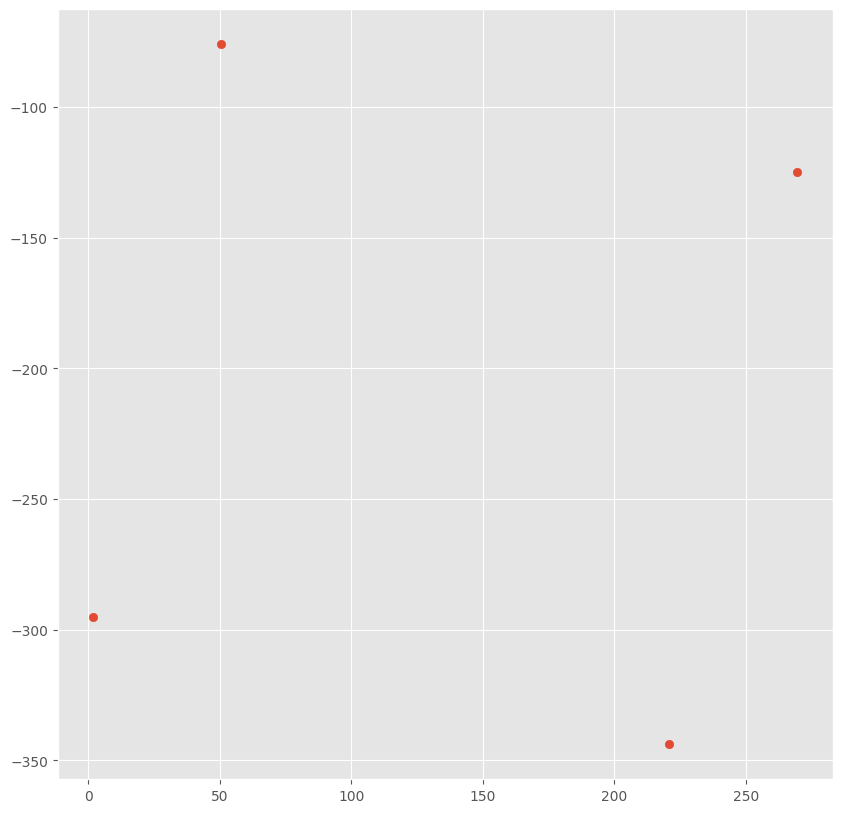

In [12]:
# use tsne to visualize the embeddings
from sklearn.manifold import TSNE

embeddings = list(titles_embeddings.values())
data = TSNE(n_components=2, random_state=0).fit_transform(embeddings)

# plot embedding 
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data[:,0], data[:,1])


